In [1]:
import  pandas as pd 
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

# Membaca data
df = pd.read_csv('Label Manual 250 review Netflik Indo.csv')

# Atur tampilan
pd.set_option('display.max_colwidth', None)

# Tampilkan data awal
df.head()

,username,content,score,at,sentimen
0,Siti Fakhirah Qorrian,kualitas nya bagus,5,10/16/2025 21:14,Netral
1,Agus Marwanto,memuaskan,5,10/16/2025 21:14,Netral
2,Amir Silaen,makasih terbayar nostalgia aku,5,10/16/2025 19:22,Netral
3,nico qivo,great,5,10/15/2025 23:44,Netral
4,Muhammad Ichwan,good,5,10/15/2025 23:35,Netral


PREPROCESSING

In [3]:
import string

# FUNGSI PREPROCESSING TEKS (content)
def simple_text_cleaner(text):
    # 1. Lowercasing
    text = text.lower()
    
    # 2. Menghapus URL dan Tanda Baca
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # 3. Menghapus angka dan spasi berlebihan
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip() # Mengganti spasi ganda menjadi tunggal
    
    return text

# Menerapkan pembersihan teks
df['clean_teks'] = df['content'].apply(simple_text_cleaner)

# menampilkan hasil
df

,username,content,score,at,sentimen,clean_teks
0,Siti Fakhirah Qorrian,kualitas nya bagus,5,10/16/2025 21:14,Netral,kualitas nya bagus
1,Agus Marwanto,memuaskan,5,10/16/2025 21:14,Netral,memuaskan
2,Amir Silaen,makasih terbayar nostalgia aku,5,10/16/2025 19:22,Netral,makasih terbayar nostalgia aku
3,nico qivo,great,5,10/15/2025 23:44,Netral,great
4,Muhammad Ichwan,good,5,10/15/2025 23:35,Netral,good
...,...,...,...,...,...,...
244,DIKI 5529B,"Assalamu'alaikum. Kpd yg terhormat aplikasi netflix. Aplikasi satu satu nya yg sangat jelek. Begitu saya download, dan saya coba daftar pakek gmail, langsung di arah kan ke gmail, di suruh bayar 54.000.itu kita sebagai warga Indonesia yg kurang mampu. Ngapain di buat aplikasi sejelek ini. Saya sangat kecewa.",1,10/6/2025 15:11,Negatif,assalamualaikum kpd yg terhormat aplikasi netflix aplikasi satu satu nya yg sangat jelek begitu saya download dan saya coba daftar pakek gmail langsung di arah kan ke gmail di suruh bayar itu kita sebagai warga indonesia yg kurang mampu ngapain di buat aplikasi sejelek ini saya sangat kecewa
245,riyanti 27,loginnya susah bgt gilak padahal sandi email ama no hp ga salahhh lohhh knp ga valid Mulu,1,10/6/2025 14:20,Negatif,loginnya susah bgt gilak padahal sandi email ama no hp ga salahhh lohhh knp ga valid mulu
246,Akun Utama,KEMBALI KAN TAMPILAN KE VERSI SEBELUM NYA !!!!!!,3,8/24/2025 12:58,Negatif,kembali kan tampilan ke versi sebelum nya
247,ADIN MONEK PATRA,tiba tiba tanggal 24 Agustus 2025 saya lagi nonton dungeon meshi jam 7 am tiba tiba film nya gada dan gabisa di putar dan beberapa anime yang saya tonton tiba tiba gada padahal lagi nonton saya keluar app bentar pas masuk gada aneh emang ngeselin padahal dikit lagi kelar,3,8/24/2025 8:22,Negatif,tiba tiba tanggal agustus saya lagi nonton dungeon meshi jam am tiba tiba film nya gada dan gabisa di putar dan beberapa anime yang saya tonton tiba tiba gada padahal lagi nonton saya keluar app bentar pas masuk gada aneh emang ngeselin padahal dikit lagi kelar


In [4]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()
df['stemmed'] = df['clean_teks'].apply(lambda x: stemmer.stem(x))

pd.set_option('display.max_colwidth', None)
df

,username,content,score,at,sentimen,clean_teks,stemmed
0,Siti Fakhirah Qorrian,kualitas nya bagus,5,10/16/2025 21:14,Netral,kualitas nya bagus,kualitas nya bagus
1,Agus Marwanto,memuaskan,5,10/16/2025 21:14,Netral,memuaskan,muas
2,Amir Silaen,makasih terbayar nostalgia aku,5,10/16/2025 19:22,Netral,makasih terbayar nostalgia aku,makasih bayar nostalgia aku
3,nico qivo,great,5,10/15/2025 23:44,Netral,great,great
4,Muhammad Ichwan,good,5,10/15/2025 23:35,Netral,good,good
...,...,...,...,...,...,...,...
244,DIKI 5529B,"Assalamu'alaikum. Kpd yg terhormat aplikasi netflix. Aplikasi satu satu nya yg sangat jelek. Begitu saya download, dan saya coba daftar pakek gmail, langsung di arah kan ke gmail, di suruh bayar 54.000.itu kita sebagai warga Indonesia yg kurang mampu. Ngapain di buat aplikasi sejelek ini. Saya sangat kecewa.",1,10/6/2025 15:11,Negatif,assalamualaikum kpd yg terhormat aplikasi netflix aplikasi satu satu nya yg sangat jelek begitu saya download dan saya coba daftar pakek gmail langsung di arah kan ke gmail di suruh bayar itu kita sebagai warga indonesia yg kurang mampu ngapain di buat aplikasi sejelek ini saya sangat kecewa,assalamualaikum kpd yg hormat aplikasi netflix aplikasi satu satu nya yg sangat jelek begitu saya download dan saya coba daftar pakek gmail langsung di arah kan ke gmail di suruh bayar itu kita bagai warga indonesia yg kurang mampu ngapain di buat aplikasi jelek ini saya sangat kecewa
245,riyanti 27,loginnya susah bgt gilak padahal sandi email ama no hp ga salahhh lohhh knp ga valid Mulu,1,10/6/2025 14:20,Negatif,loginnya susah bgt gilak padahal sandi email ama no hp ga salahhh lohhh knp ga valid mulu,loginnya susah bgt gilak padahal sandi email ama no hp ga salahhh lohhh knp ga valid mulu
246,Akun Utama,KEMBALI KAN TAMPILAN KE VERSI SEBELUM NYA !!!!!!,3,8/24/2025 12:58,Negatif,kembali kan tampilan ke versi sebelum nya,kembali kan tampil ke versi belum nya
247,ADIN MONEK PATRA,tiba tiba tanggal 24 Agustus 2025 saya lagi nonton dungeon meshi jam 7 am tiba tiba film nya gada dan gabisa di putar dan beberapa anime yang saya tonton tiba tiba gada padahal lagi nonton saya keluar app bentar pas masuk gada aneh emang ngeselin padahal dikit lagi kelar,3,8/24/2025 8:22,Negatif,tiba tiba tanggal agustus saya lagi nonton dungeon meshi jam am tiba tiba film nya gada dan gabisa di putar dan beberapa anime yang saya tonton tiba tiba gada padahal lagi nonton saya keluar app bentar pas masuk gada aneh emang ngeselin padahal dikit lagi kelar,tiba tiba tanggal agustus saya lagi nonton dungeon meshi jam am tiba tiba film nya gada dan gabisa di putar dan beberapa anime yang saya tonton tiba tiba gada padahal lagi nonton saya keluar app bentar pas masuk gada aneh emang ngeselin padahal dikit lagi kelar


In [5]:
# Feature Extraction Dengan TF - IDF
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(df['stemmed'])
y = y = df['sentimen']
print("Shape TF-IDF :", x.shape)

Shape TF-IDF : (249, 890)


In [6]:
from sklearn.feature_extraction.text import CountVectorizer

# 1. Inisialisasi dan Transformasi CountVectorizer
count_vectorizer = CountVectorizer()
X_count = count_vectorizer.fit_transform(df['stemmed'])

# 2. Membuat DataFrame dari CountVectorizer
count_df = pd.DataFrame(
    X_count.toarray(),
    columns=count_vectorizer.get_feature_names_out()
)

df

,username,content,score,at,sentimen,clean_teks,stemmed
0,Siti Fakhirah Qorrian,kualitas nya bagus,5,10/16/2025 21:14,Netral,kualitas nya bagus,kualitas nya bagus
1,Agus Marwanto,memuaskan,5,10/16/2025 21:14,Netral,memuaskan,muas
2,Amir Silaen,makasih terbayar nostalgia aku,5,10/16/2025 19:22,Netral,makasih terbayar nostalgia aku,makasih bayar nostalgia aku
3,nico qivo,great,5,10/15/2025 23:44,Netral,great,great
4,Muhammad Ichwan,good,5,10/15/2025 23:35,Netral,good,good
...,...,...,...,...,...,...,...
244,DIKI 5529B,"Assalamu'alaikum. Kpd yg terhormat aplikasi netflix. Aplikasi satu satu nya yg sangat jelek. Begitu saya download, dan saya coba daftar pakek gmail, langsung di arah kan ke gmail, di suruh bayar 54.000.itu kita sebagai warga Indonesia yg kurang mampu. Ngapain di buat aplikasi sejelek ini. Saya sangat kecewa.",1,10/6/2025 15:11,Negatif,assalamualaikum kpd yg terhormat aplikasi netflix aplikasi satu satu nya yg sangat jelek begitu saya download dan saya coba daftar pakek gmail langsung di arah kan ke gmail di suruh bayar itu kita sebagai warga indonesia yg kurang mampu ngapain di buat aplikasi sejelek ini saya sangat kecewa,assalamualaikum kpd yg hormat aplikasi netflix aplikasi satu satu nya yg sangat jelek begitu saya download dan saya coba daftar pakek gmail langsung di arah kan ke gmail di suruh bayar itu kita bagai warga indonesia yg kurang mampu ngapain di buat aplikasi jelek ini saya sangat kecewa
245,riyanti 27,loginnya susah bgt gilak padahal sandi email ama no hp ga salahhh lohhh knp ga valid Mulu,1,10/6/2025 14:20,Negatif,loginnya susah bgt gilak padahal sandi email ama no hp ga salahhh lohhh knp ga valid mulu,loginnya susah bgt gilak padahal sandi email ama no hp ga salahhh lohhh knp ga valid mulu
246,Akun Utama,KEMBALI KAN TAMPILAN KE VERSI SEBELUM NYA !!!!!!,3,8/24/2025 12:58,Negatif,kembali kan tampilan ke versi sebelum nya,kembali kan tampil ke versi belum nya
247,ADIN MONEK PATRA,tiba tiba tanggal 24 Agustus 2025 saya lagi nonton dungeon meshi jam 7 am tiba tiba film nya gada dan gabisa di putar dan beberapa anime yang saya tonton tiba tiba gada padahal lagi nonton saya keluar app bentar pas masuk gada aneh emang ngeselin padahal dikit lagi kelar,3,8/24/2025 8:22,Negatif,tiba tiba tanggal agustus saya lagi nonton dungeon meshi jam am tiba tiba film nya gada dan gabisa di putar dan beberapa anime yang saya tonton tiba tiba gada padahal lagi nonton saya keluar app bentar pas masuk gada aneh emang ngeselin padahal dikit lagi kelar,tiba tiba tanggal agustus saya lagi nonton dungeon meshi jam am tiba tiba film nya gada dan gabisa di putar dan beberapa anime yang saya tonton tiba tiba gada padahal lagi nonton saya keluar app bentar pas masuk gada aneh emang ngeselin padahal dikit lagi kelar


In [7]:
x_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

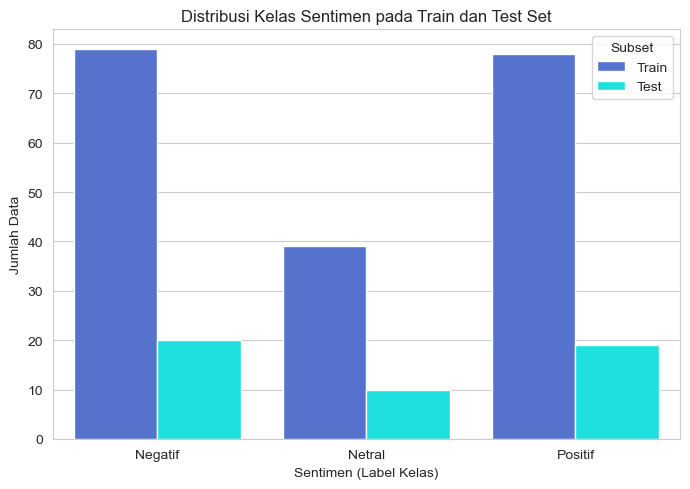

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# --- 1. MEMBACA & MENYIAPKAN DATA ---
file_path = 'Label Manual 250 review Netflik Indo.csv'
df = pd.read_csv(file_path)

# Encoding Target (y)
df['sentimen'] = df['sentimen'].str.strip()
mapping_sentimen = {'Negatif': 0, 'Netral': 1, 'Positif': 2}
df['Label'] = df['sentimen'].map(mapping_sentimen)
df.dropna(subset=['Label'], inplace=True) 

# Membagi data (y_train, y_test)
X = df['content'] 
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- 2. PENGGABUNGAN DATA UNTUK PLOTTING (Perbaikan Index & Kolom) ---

# Buat DataFrame Train & Test secara eksplisit dengan penamaan kolom yang konsisten
train_df = y_train.value_counts().reset_index()
train_df.columns = ['Label_Encoded', 'Jumlah Data']
train_df['Set'] = 'Train'

test_df = y_test.value_counts().reset_index()
test_df.columns = ['Label_Encoded', 'Jumlah Data']
test_df['Set'] = 'Test'

# Gabungkan data
df_combined = pd.concat([train_df, test_df])

# Tambahkan label Sentimen dan tetapkan urutan kategorikal (PENTING untuk plotting)
label_names = {0.0: 'Negatif', 1.0: 'Netral', 2.0: 'Positif'} 
order = ['Negatif', 'Netral', 'Positif']

df_combined['Sentimen'] = df_combined['Label_Encoded'].map(label_names)
df_combined['Sentimen'] = pd.Categorical(df_combined['Sentimen'], categories=order, ordered=True)

# --- 3. PLOTTING MENGGUNAKAN SEABORN (SATU GAMBAR) ---
sns.set_style("whitegrid")
plt.figure(figsize=(7, 5))

sns.barplot(
    x='Sentimen', 
    y='Jumlah Data', 
    hue='Set',        # Mengelompokkan berdasarkan 'Set' (Train/Test)
    data=df_combined,
    palette={'Train': 'royalblue', 'Test': 'aqua'}
)

plt.xlabel("Sentimen (Label Kelas)")
plt.ylabel("Jumlah Data")
plt.title("Distribusi Kelas Sentimen pada Train dan Test Set")
plt.legend(title='Subset')
plt.tight_layout()
plt.show()

In [10]:
import pandas as pd
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier

# --- 1. PREPROCESSING LENGKAP DAN PEMBERSIHAN NaN ---
file_path = 'Label Manual 250 review Netflik Indo.csv'
df = pd.read_csv(file_path)

# PEMBERSIHAN NON-TEKS & ENCODING
df['sentimen'] = df['sentimen'].str.strip()
mapping_sentimen = {'Negatif': 0, 'Netral': 1, 'Positif': 2}
df['Label'] = df['sentimen'].map(mapping_sentimen)

# FUNGSI CLEANING TEKS
def simple_text_cleaner(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['content_clean'] = df['content'].apply(simple_text_cleaner)

# **LANGKAH KRITIS UNTUK MENGHILANGKAN ValueError:** # Hapus semua baris yang memiliki nilai NaN pada kolom Label (y) atau konten teks (X)
df.dropna(subset=['Label'], inplace=True)
df = df[df['content_clean'] != ''] # Hapus jika hasil cleaning adalah string kosong


# --- 2. PEMISAHAN DATA ---
# X menggunakan kolom teks yang sudah bersih
X = df['content_clean'] 
y = df['Label']

# Pemisahan data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# --- 3. FEATURE EXTRACTION (TF-IDF) ---
vectorizer = TfidfVectorizer()
x_train = vectorizer.fit_transform(X_train) 
x_test = vectorizer.transform(X_test) 


# --- 4. MODEL TRAINING (Kode yang Anda coba jalankan) ---
# Ukuran data sekarang dijamin selaras dan bersih dari NaN/Inf

clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(x_train, y_train)

print(f"Data Train Berhasil Dilatih. Ukuran X: {x_train.shape}, Ukuran Y: {len(y_train)}")
print("Model Decision Tree Berhasil Dilatih tanpa ValueError!")

Data Train Berhasil Dilatih. Ukuran X: (196, 817), Ukuran Y: 196
Model Decision Tree Berhasil Dilatih tanpa ValueError!


In [11]:
# membangun model decision tree

clf = DecisionTreeClassifier(criterion= 'entropy',random_state=42)
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [12]:
# --- 4. PREDIKSI DAN EVALUASI (Kode yang Diperbaiki) ---

print("## Prediksi dan Evaluasi Model Decision Tree\n")

# Menggunakan x_test (matriks fitur numerik) untuk prediksi
y_pred = clf.predict(x_test) 

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

## Prediksi dan Evaluasi Model Decision Tree

Confusion Matrix:
 [[15  0  5]
 [ 2  6  2]
 [ 3  4 12]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.75      0.75        20
         1.0       0.60      0.60      0.60        10
         2.0       0.63      0.63      0.63        19

    accuracy                           0.67        49
   macro avg       0.66      0.66      0.66        49
weighted avg       0.67      0.67      0.67        49



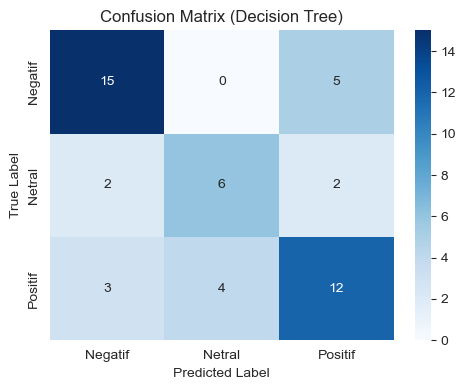

In [13]:
cm = confusion_matrix(y_test, y_pred)
labels = ['Negatif', 'Netral', 'Positif'] 

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Decision Tree)")
plt.tight_layout()
plt.show()

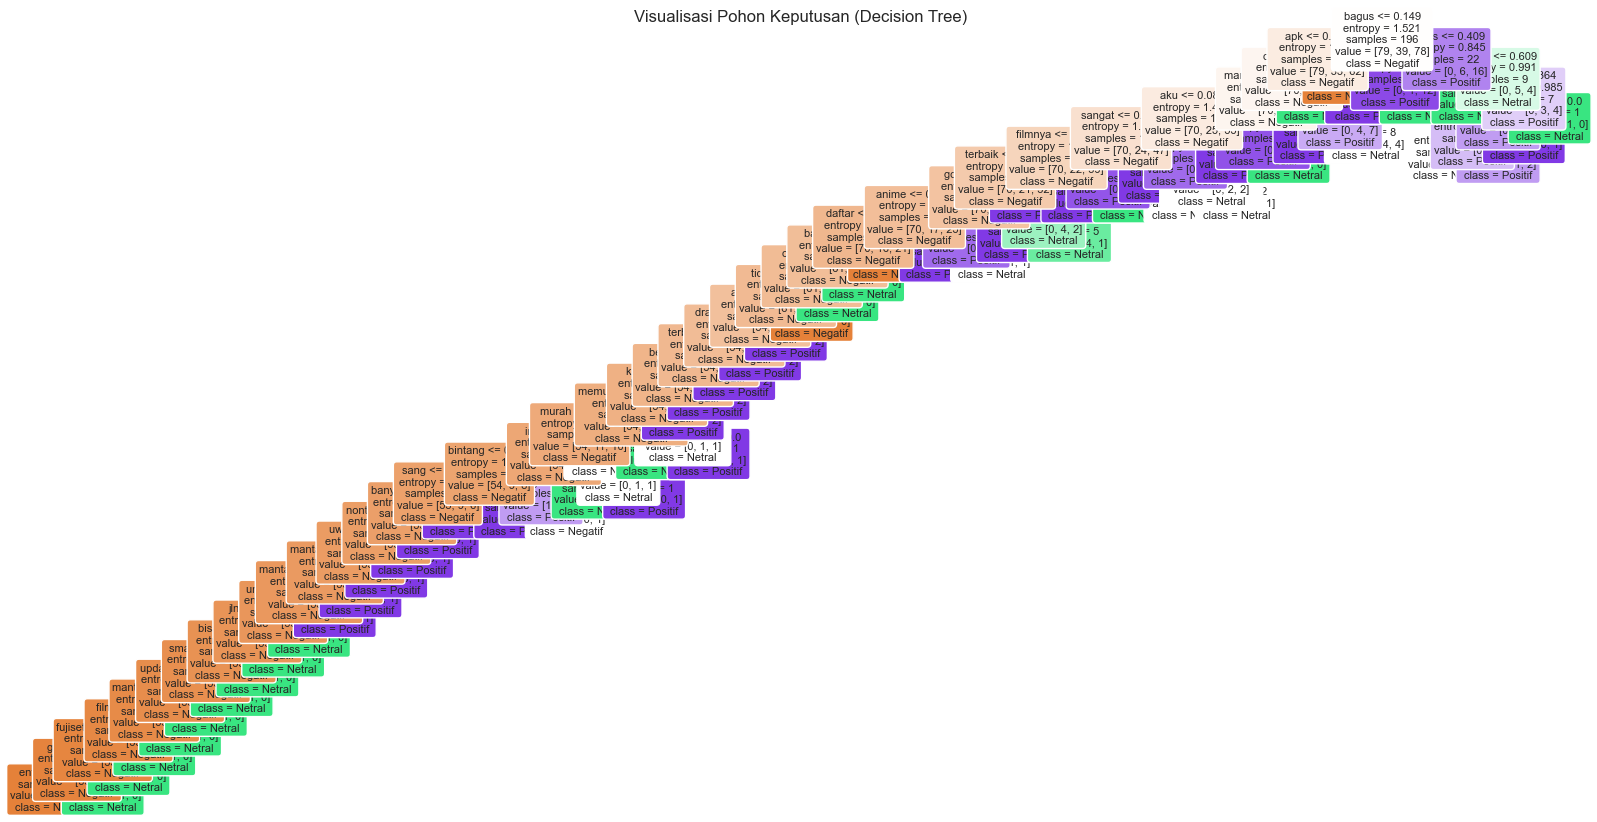

In [14]:
# --- Definisikan Nama Kelas (String) ---
# Label yang sesuai dengan 0, 1, 2
class_names_str = ['Negatif', 'Netral', 'Positif'] 

plt.figure(figsize=(20, 10))

# Menggunakan plot_tree dengan perbaikan:
# 1. class_names diubah ke format string (class_names_str)
plot_tree(clf,
          feature_names=vectorizer.get_feature_names_out(),
          class_names=class_names_str, # <--- PERBAIKAN DI SINI
          filled=True,
          rounded=True,
          fontsize=8)

plt.title("Visualisasi Pohon Keputusan (Decision Tree)")
plt.show()

In [15]:
import pandas as pd
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier

# ==========================================================
# 1. SETUP KRUSIAL (DEFINISI VARIABEL YANG HILANG)
# ==========================================================

# 1A. Definisikan fungsi cleaning yang sama persis
def simple_text_cleaner(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'[^\w\s]', '', text) 
    text = re.sub(r'\d+', '', text) 
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# 1B. Definisi label_map (YANG MENGHILANGKAN ERROR NameError)
label_map = {0: 'Negatif', 1: 'Netral', 2: 'Positif'}


# 1C. Simulasi Inisialisasi Model dan Vektorizer
# (Bagian ini perlu dijalankan agar 'vectorizer' dan 'clf' terdefinisi)
try:
    file_path = 'Label Manual 250 review Netflik Indo.csv'
    df = pd.read_csv(file_path)
    df['sentimen'] = df['sentimen'].str.strip()
    df['Label'] = df['sentimen'].map(label_map)
    df['content_clean'] = df['content'].apply(simple_text_cleaner)
    df.dropna(subset=['Label'], inplace=True)
    df = df[df['content_clean'] != ''] 

    X = df['content_clean'] 
    y = df['Label']
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    vectorizer = TfidfVectorizer()
    x_train = vectorizer.fit_transform(X_train) 
    clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
    clf.fit(x_train, y_train)
    
except Exception as e:
    print(f"Error saat setup: {e}. Pastikan file Anda ada.")
    exit()

# ==========================================================
# 2. KODE PREDIKSI TEKS BARU YANG DIMINTA PENGGUNA
# ==========================================================

print("## Hasil Prediksi Teks Baru (Model Decision Tree)")
print("--------------------------------------------------")

# Teks yang akan diprediksi
contoh = [
    "Netflix banyak pilihan film",
    "kenapa netflix harus berbayar",
    "sering buffering tapi harga mahal",
    "aplikasinya sangat bagus sekali"
]

# 1. Cleaning Teks
contoh_clean = [simple_text_cleaner(t) for t in contoh] 

# 2. Transformasi ke Matriks Fitur (TF-IDF)
contoh_tfidf = vectorizer.transform(contoh_clean)

# 3. Prediksi
pred_encoded = clf.predict(contoh_tfidf)

# 4. Tampilkan Hasil (NameError teratasi karena label_map sudah didefinisikan)
for t, p_code in zip(contoh, pred_encoded):
    print(f"Teks: {t}\n-> Prediksi: {label_map[p_code]} ({p_code})\n")

Error saat setup: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.. Pastikan file Anda ada.
## Hasil Prediksi Teks Baru (Model Decision Tree)
--------------------------------------------------
Teks: Netflix banyak pilihan film
-> Prediksi: Positif (2.0)

Teks: kenapa netflix harus berbayar
-> Prediksi: Negatif (0.0)

Teks: sering buffering tapi harga mahal
-> Prediksi: Negatif (0.0)

Teks: aplikasinya sangat bagus sekali
-> Prediksi: Positif (2.0)



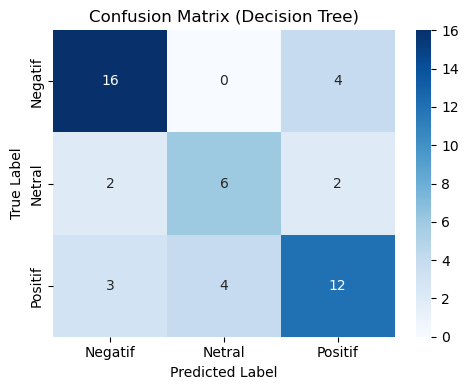

In [2]:
# KODE CONFUSION MATRIX (Visualisasi)
# -------------------------------------------------------------------

# Hitung Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Definisikan label kelas (sesuai urutan 0, 1, 2)
labels = ['Negatif', 'Netral', 'Positif'] 

# Visualisasi Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Decision Tree)")
plt.tight_layout()
plt.show()

Menampilkan Visualisasi Pohon Keputusan...
Catatan: Pohon dibatasi (max_depth=5) agar mudah dilihat.


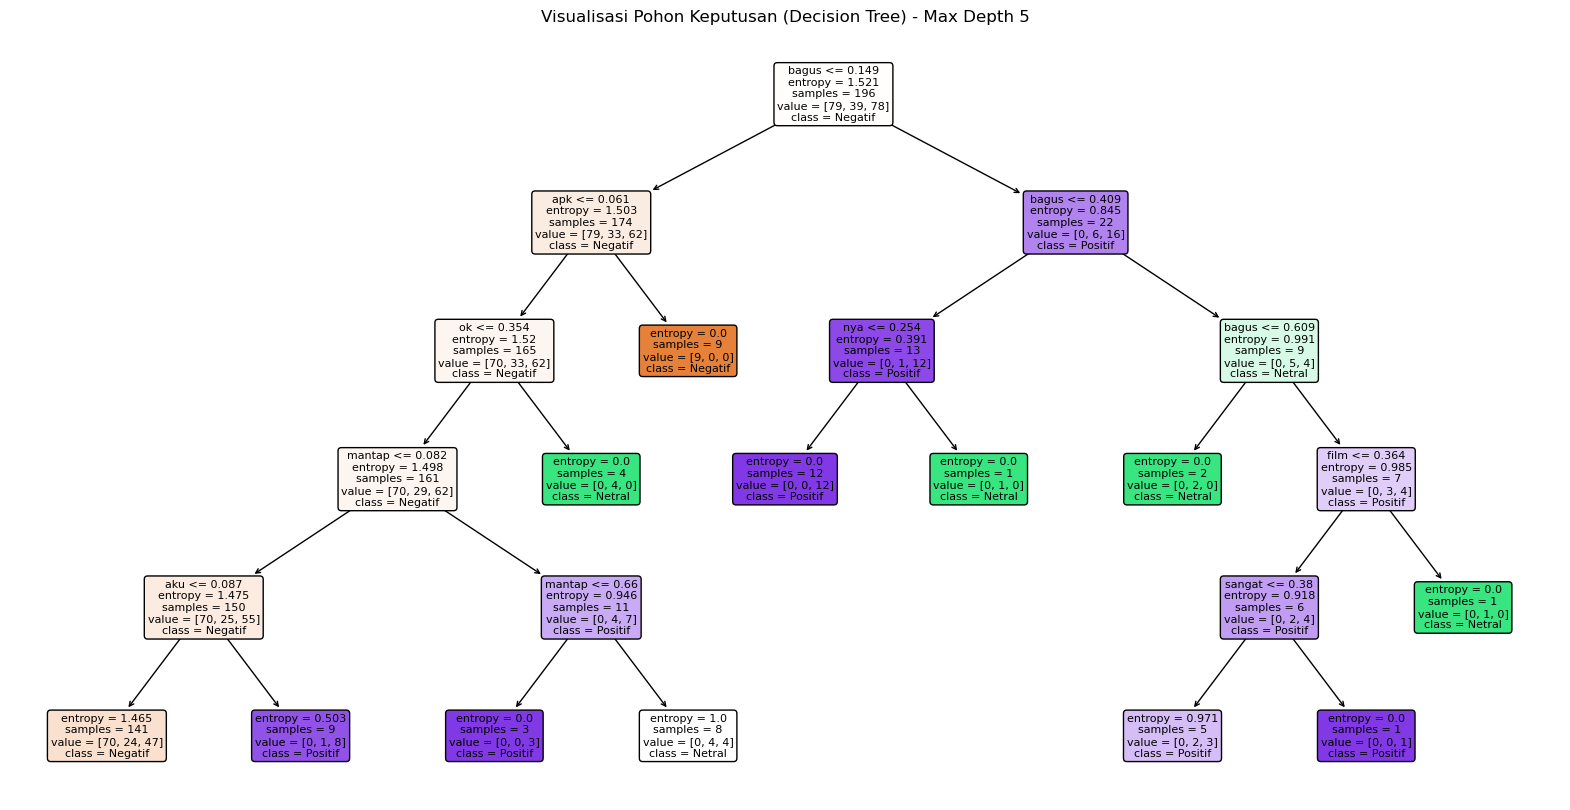

In [5]:
# ----------------------------------------------------
# 2. VISUALISASI STRUKTUR POHON KEPUTUSAN (Kode yang Anda Minta)
# ----------------------------------------------------

# Ambil nama kelas asli
class_names = ['Negatif', 'Netral', 'Positif']

print("Menampilkan Visualisasi Pohon Keputusan...")
print("Catatan: Pohon dibatasi (max_depth=5) agar mudah dilihat.")

# VISUALISASI STRUKTUR POHON KEPUTUSAN
plt.figure(figsize=(20, 10)) # Ukuran yang lebih besar
plot_tree(
    clf,
    filled=True,
    feature_names=vectorizer.get_feature_names_out(), # Nama fitur dari TF-IDF
    class_names=class_names, # Nama kelas yang lebih mudah dibaca
    rounded=True,
    fontsize=8
)
plt.title("Visualisasi Pohon Keputusan (Decision Tree) - Max Depth 5")
plt.show()

Model Naive Bayes

In [6]:
import pandas as pd
import numpy as np
import re

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt

In [8]:
#  Baca file CSV & bersihkan nama kolom
df = pd.read_csv('Label Manual 250 review Netflik Indo.csv')

# rapikan nama kolom supaya konsisten
df.columns = df.columns.str.strip().str.lower()

# tampilkan 5 baris awal & kolom
print("Kolom pada dataset:", df.columns.tolist())
df.head()

Kolom pada dataset: ['username', 'content', 'score', 'at', 'sentimen']


,username,content,score,at,sentimen
0,Siti Fakhirah Qorrian,kualitas nya bagus,5,10/16/2025 21:14,Netral
1,Agus Marwanto,memuaskan,5,10/16/2025 21:14,Netral
2,Amir Silaen,makasih terbayar nostalgia aku,5,10/16/2025 19:22,Netral
3,nico qivo,great,5,10/15/2025 23:44,Netral
4,Muhammad Ichwan,good,5,10/15/2025 23:35,Netral


In [9]:
# Kolom kunci untuk dropna (content dan sentimen adalah kolom inti)
KEY_COLS_TO_CHECK = ['content', 'sentimen']

# Hitung jumlah baris sebelum pembersihan
initial_rows = len(df)

# Drop baris di mana content atau sentimen bernilai NaN (Missing Value)
df_cleaned = df.dropna(subset=KEY_COLS_TO_CHECK).reset_index(drop=True)

# Hitung jumlah baris setelah pembersihan
final_rows = len(df_cleaned)
rows_dropped = initial_rows - final_rows

print(f"Jumlah baris Awal: {initial_rows}")
print(f"Kolom Kunci untuk Pengecekan Missing: {KEY_COLS_TO_CHECK}")
print(f"Jumlah baris setelah Pembersihan (Drop NaNs): {final_rows}")
print(f"Total Baris yang Dihapus: {rows_dropped}")

# Ganti df lama dengan df yang sudah dibersihkan
df = df_cleaned

Jumlah baris Awal: 249
Kolom Kunci untuk Pengecekan Missing: ['content', 'sentimen']
Jumlah baris setelah Pembersihan (Drop NaNs): 249
Total Baris yang Dihapus: 0


In [13]:
def preprocess_teks_v2(text):
    text = str(text).lower()
    
    # 1. Menghapus URL
    text = re.sub(r'http\S+|www\S+|https\S+', ' ', text)
    
    # 2. Menghilangkan semua karakter yang bukan huruf (a-z) atau spasi
    # Ini menghapus tanda baca, angka, dan karakter spesial lainnya
    text = re.sub(r'[^a-z\s]+', ' ', text)
    
    # 3. Menghilangkan spasi ganda dan spasi di ujung
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Terapkan ke kolom 'content'
df['final_content_v2'] = df['content'].apply(preprocess_teks_v2)

df

,username,content,score,at,sentimen,clean_content_v2,final_content_v2
0,Siti Fakhirah Qorrian,kualitas nya bagus,5,10/16/2025 21:14,Netral,kualitas nya bagus,kualitas nya bagus
1,Agus Marwanto,memuaskan,5,10/16/2025 21:14,Netral,memuaskan,memuaskan
2,Amir Silaen,makasih terbayar nostalgia aku,5,10/16/2025 19:22,Netral,makasih terbayar nostalgia aku,makasih terbayar nostalgia aku
3,nico qivo,great,5,10/15/2025 23:44,Netral,great,great
4,Muhammad Ichwan,good,5,10/15/2025 23:35,Netral,good,good
...,...,...,...,...,...,...,...
244,DIKI 5529B,Assalamu'alaikum. Kpd yg terhormat aplikasi ne...,1,10/6/2025 15:11,Negatif,assalamu alaikum kpd yg terhormat aplikasi net...,assalamu alaikum kpd yg terhormat aplikasi net...
245,riyanti 27,loginnya susah bgt gilak padahal sandi email a...,1,10/6/2025 14:20,Negatif,loginnya susah bgt gilak padahal sandi email a...,loginnya susah bgt gilak padahal sandi email a...
246,Akun Utama,KEMBALI KAN TAMPILAN KE VERSI SEBELUM NYA !!!!!!,3,8/24/2025 12:58,Negatif,kembali kan tampilan ke versi sebelum nya,kembali kan tampilan ke versi sebelum nya
247,ADIN MONEK PATRA,tiba tiba tanggal 24 Agustus 2025 saya lagi no...,3,8/24/2025 8:22,Negatif,tiba tiba tanggal agustus saya lagi nonton dun...,tiba tiba tanggal agustus saya lagi nonton dun...


In [16]:
# --- 2. VERSI ALTERNATIF FEATURE & TARGET PREPARATION ---

# A. Siapkan fitur (X) - Menggunakan CountVectorizer
# Menghitung frekuensi kemunculan kata (bukan bobot TF-IDF)
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))  # batasi fitur agar tidak terlalu besar
X = vectorizer.fit_transform(df['final_content_v2'])

# B. Siapkan target (y) - Menggunakan Manual Dictionary Mapping
# Lebih sederhana dan eksplisit daripada LabelEncoder untuk kelas yang sedikit
mapping = {'Negatif': 0, 'Netral': 1, 'Positif': 2}
y = df['sentimen'].map(mapping).values


# C. Tampilkan Hasil
print("## Hasil Alternatif Feature (X) & Target (y) Preparation")
print("---------------------------------------------------------")
print("Metode Feature Extraction: CountVectorizer (alternatif dari TF-IDF)")
print("Metode Label Encoding: Manual Dictionary Mapping (alternatif dari LabelEncoder)")
print("\nMapping label:", mapping)
print(f"Shape X (CountVectorizer): {X.shape}")
print(f"Shape y (Manual Map): {y.shape}")

## Hasil Alternatif Feature (X) & Target (y) Preparation
---------------------------------------------------------
Metode Feature Extraction: CountVectorizer (alternatif dari TF-IDF)
Metode Label Encoding: Manual Dictionary Mapping (alternatif dari LabelEncoder)

Mapping label: {'Negatif': 0, 'Netral': 1, 'Positif': 2}
Shape X (CountVectorizer): (249, 3130)
Shape y (Manual Map): (249,)


ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.